In [1]:
%pip install tensorflow matplotlib scikit-learn pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from tensorflow import keras
from keras import backend
from keras.callbacks import ModelCheckpoint
from keras.layers import Activation, Subtract, Dense, Input
from keras.models import Model
import numpy as np
import requests

2023-02-18 14:30:27.734129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-18 14:30:32.431158: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-18 14:30:32.431241: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-18 14:30:58.876774: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [3]:
INPUT_DIM = 24
h_1_dim = 64
h_2_dim = h_1_dim // 2
h_3_dim = h_2_dim // 2

# Model.
h_1 = Dense(h_1_dim, activation = "relu")
h_2 = Dense(h_2_dim, activation = "relu")
h_3 = Dense(h_3_dim, activation = "relu")
s = Dense(1)

# Relevant document score.
rel_doc = Input(shape = (INPUT_DIM, ), dtype = "float32")
h_1_rel = h_1(rel_doc)
h_2_rel = h_2(h_1_rel)
h_3_rel = h_3(h_2_rel)
rel_score = s(h_3_rel)

# Irrelevant document score.
irr_doc = Input(shape = (INPUT_DIM, ), dtype = "float32")
h_1_irr = h_1(irr_doc)
h_2_irr = h_2(h_1_irr)
h_3_irr = h_3(h_2_irr)
irr_score = s(h_3_irr)

# Subtract scores.
diff = Subtract()([rel_score, irr_score])

# Pass difference through sigmoid function.
prob = Activation("sigmoid")(diff)

# Build model.
model = Model(inputs = [rel_doc, irr_doc], outputs = prob)
model.compile(optimizer = "adadelta", loss = "binary_crossentropy", metrics=['accuracy'])

2023-02-18 14:31:26.848929: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-18 14:31:26.849127: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-18 14:31:26.849263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thesis-ubuntu): /proc/driver/nvidia/version does not exist
2023-02-18 14:31:26.860337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


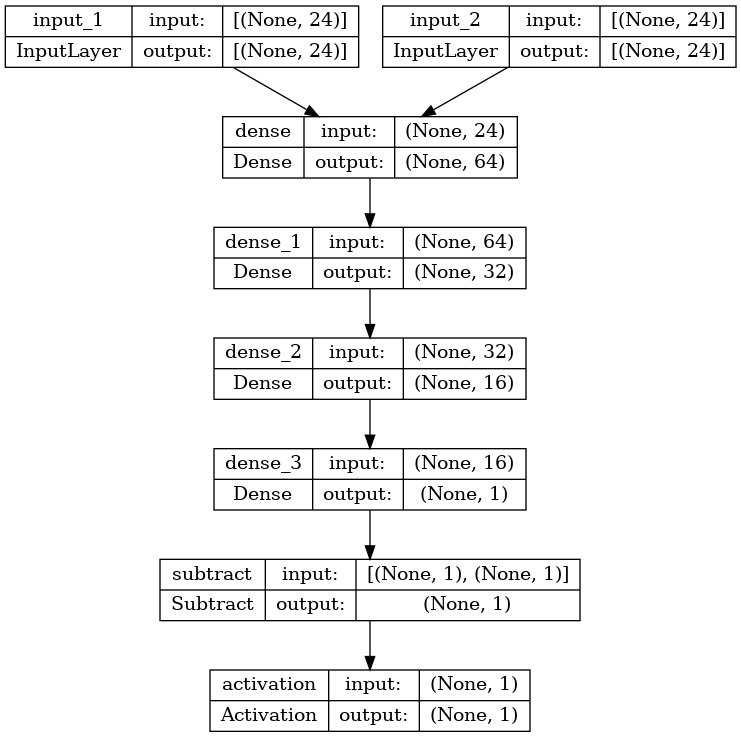

In [23]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [5]:
from os import listdir
from os.path import isfile, join
def getJudgmentsBatchFileByFile():
    """
    Returns a generator function that returns all the judgment batches files from the directory
    """
    files = []
   
    files = [join('./loggedFeatures', file) for file in listdir('./loggedFeatures') if isfile(join('./loggedFeatures', file))]
    for file in files:
        yield file

In [6]:
import csv
judgments = []
for file in getJudgmentsBatchFileByFile():
  with open(file,'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
      data = []
      for element in row:
        data.append(element.replace(',', ''))
      judgments.append(data)

In [7]:
judgments.sort(key = lambda judgments: judgments[1])
print(judgments[0])
print(judgments[1])
print(judgments[2])
print(judgments[3])

['0', '10000', 'msmarco_doc_05_72507775', '1.0', '2.0', '8.0', '8.0', '0.083333336', '0.16666667', '0.6666667', '0.6666667', '1.0', '2.4142137', '36.53677', '36.764153', '90.677284', '72.23833', '41.410515', '41.410515', '7.282527', '10.645987', '84.99544', '85.76555', '1.655931', '1.747792', '5.9285426', '6.021519']
['1', '10000', 'msmarco_doc_10_1691063043', '1.0', '8.0', '9.0', '9.0', '0.083333336', '0.6666667', '0.75', '0.75', '1.0', '11.69213', '55.452248', '56.990223', '90.677284', '72.23833', '41.410515', '41.410515', '7.7639008', '64.12446', '153.44191', '158.3429', '3.4576335', '13.961745', '14.04283', '14.179642']
['1', '1000005', 'msmarco_doc_19_673141443', '2.0', '2.0', '4.0', '4.0', '0.5', '0.5', '1.0', '1.0', '2.0', '2.828427', '18.934044', '19.41233', '27.758165', '22.795256', '13.165058', '13.165058', '17.45566', '22.153984', '77.66603', '79.93644', '9.476915', '9.96361', '7.746788', '7.7889223']
['0', '1000005', 'msmarco_doc_19_673231526', '1.0', '1.0', '2.0', '2.0', '

In [8]:
for j in judgments:
  del j[2]

print(judgments[0])
print(judgments[1])
print(judgments[2])
print(judgments[3])
print(judgments[4])
print(judgments[5])
print(judgments[6])
print(judgments[7])

['0', '10000', '1.0', '2.0', '8.0', '8.0', '0.083333336', '0.16666667', '0.6666667', '0.6666667', '1.0', '2.4142137', '36.53677', '36.764153', '90.677284', '72.23833', '41.410515', '41.410515', '7.282527', '10.645987', '84.99544', '85.76555', '1.655931', '1.747792', '5.9285426', '6.021519']
['1', '10000', '1.0', '8.0', '9.0', '9.0', '0.083333336', '0.6666667', '0.75', '0.75', '1.0', '11.69213', '55.452248', '56.990223', '90.677284', '72.23833', '41.410515', '41.410515', '7.7639008', '64.12446', '153.44191', '158.3429', '3.4576335', '13.961745', '14.04283', '14.179642']
['1', '1000005', '2.0', '2.0', '4.0', '4.0', '0.5', '0.5', '1.0', '1.0', '2.0', '2.828427', '18.934044', '19.41233', '27.758165', '22.795256', '13.165058', '13.165058', '17.45566', '22.153984', '77.66603', '79.93644', '9.476915', '9.96361', '7.746788', '7.7889223']
['0', '1000005', '1.0', '1.0', '2.0', '2.0', '0.25', '0.25', '0.5', '0.5', '1.0', '1.4142135', '8.70179', '8.973479', '27.758165', '22.795256', '13.165058', '

In [9]:
def normalizeFeatures(loggedJudgments):
    minimums = [100 for _ in loggedJudgments[0][2:]]
    maximums = [0 for _ in loggedJudgments[0][2:]]
    
    for judgment in loggedJudgments:
        for idx, feature in enumerate(judgment[2:]):
            if minimums[idx] > float(feature):
                minimums[idx] = float(feature)
            
            if maximums[idx] < float(feature):
                maximums[idx] = float(feature)
    
    
        
    normedJudgments = []
    for judgment in loggedJudgments:
        normedFeatures = [0 for _ in judgment[2:]]
        for idx, feature in enumerate(judgment[2:]):
            normedFeatures[idx] = (float(feature) - minimums[idx]) / (maximums[idx] - minimums[idx])
        normedJudgment = judgment[:2]
        normedJudgment.extend(normedFeatures)
        normedJudgments.append(normedJudgment)
    
    return minimums, maximums, normedJudgments

In [10]:
minimums, maximums, normalizedJudgments = normalizeFeatures(judgments)

In [11]:
#create pairs
xi = []
xj = []
pij = []

for i in range(1, len(normalizedJudgments), 2):
  if normalizedJudgments[i-1][0] < normalizedJudgments[i][0]:
    _pij = 0
    xi.append(normalizedJudgments[i - 1][2:])
    xj.append(normalizedJudgments[i][2:])
    pij.append(_pij)
  elif normalizedJudgments[i-1][0] > normalizedJudgments[i][0]:
    _pij = 1
    xi.append(normalizedJudgments[i - 1][2:])
    xj.append(normalizedJudgments[i][2:])
    pij.append(_pij)

In [12]:
xi = np.array(xi, dtype='float64')

In [13]:
xj = np.array(xj, dtype='float64')

In [14]:
pij = np.array(pij, dtype='float64')

In [15]:
from sklearn.model_selection import train_test_split

xi_train, xi_test, xj_train, xj_test, pij_train, pij_test = train_test_split(
    xi, xj, pij, test_size=0.2, shuffle=False)

In [16]:
NUM_EPOCHS = 100
BATCH_SIZE = 64
checkpointer = ModelCheckpoint(filepath = "training/best_params.h5", verbose = 1, save_best_only = True)
history = model.fit([xi_train, xj_train], pij_train,
                     epochs = NUM_EPOCHS, batch_size = BATCH_SIZE, validation_data=([xi_test, xj_test], pij_test),
                     callbacks = [checkpointer])

Epoch 1/100
993/995 [============================>.] - ETA: 0s - loss: 0.6599 - accuracy: 0.8575
Epoch 1: val_loss improved from inf to 0.64570, saving model to training/best_params.h5
995/995 [==============================] - 8s 6ms/step - loss: 0.6599 - accuracy: 0.8576 - val_loss: 0.6457 - val_accuracy: 0.8750
Epoch 2/100
991/995 [============================>.] - ETA: 0s - loss: 0.6336 - accuracy: 0.9103
Epoch 2: val_loss improved from 0.64570 to 0.61780, saving model to training/best_params.h5
995/995 [==============================] - 6s 6ms/step - loss: 0.6335 - accuracy: 0.9103 - val_loss: 0.6178 - val_accuracy: 0.9042
Epoch 3/100
986/995 [============================>.] - ETA: 0s - loss: 0.6026 - accuracy: 0.9284
Epoch 3: val_loss improved from 0.61780 to 0.58486, saving model to training/best_params.h5
995/995 [==============================] - 5s 5ms/step - loss: 0.6024 - accuracy: 0.9286 - val_loss: 0.5849 - val_accuracy: 0.9121
Epoch 4/100
990/995 [=======================

In [20]:
from keras.models import load_model
model = load_model("training/best_params.h5")

In [21]:

import json

modelName = 'thesis-ranknet-min-max-100-b64-64-3_layer-feature-work-adadelta'
solrModel = {
  "store": "thesis-ltr",
  "class": "org.apache.solr.ltr.model.NeuralNetworkModel",
  "name": modelName,
  "features": [
  ],
  "params": {}
}

featureNames = ["title_coveredQueryTerms",
    "headings_coveredQueryTerms",
    "body_coveredQueryTerms",
    "document_coveredQueryTerms",
    "title_coveredQueryTermsRatio",
    "headings_coveredQueryTermsRatio",
    "body_coveredQueryTermsRatio",
    "document_coveredQueryTermsRatio",
    "title_tf",
    "headings_tf",
    "body_tf",
    "document_tf",
    "title_idf",
    "headings_idf",
    "body_idf",
    "document_idf",
    "title_tfidf",
    "headings_tfidf",
    "body_tfidf",
    "document_tfidf",
    "title_bm25",
    "headings_bm25",
    "body_bm25",
    "document_bm25"
]

for idx, featureName in enumerate(featureNames):
    config = {
        "name": featureName,
        "norm": {
            "class": "org.apache.solr.ltr.norm.MinMaxNormalizer",
            "params": {
                "min": str(minimums[idx]),
                "max": str(maximums[idx])
            }
        }
    }
    solrModel['features'].append(config)
    
weights = model.get_weights()

layers = []
layers.append({"matrix": weights[0].T.tolist(),
               "bias": weights[1].tolist(),
               "activation": "relu"})
layers.append({"matrix": weights[2].T.tolist(),
               "bias": weights[3].tolist(),
               "activation": "relu"})
layers.append({"matrix": weights[4].T.tolist(),
              "bias": weights[5].tolist(),
              "activation": "relu"})
layers.append({"matrix": weights[6].T.tolist(),
              "bias": weights[7].tolist(),
              "activation": "identity"})
solrModel["params"]["layers"] = layers


print(json.dumps(solrModel, indent=2))

# Upload the model after deleting the model
print('Delete')
requests.delete(f'http://localhost:8983/solr/thesis-ltr/schema/model-store/{modelName}').json()
print('Add new model')
requests.put(f'http://localhost:8983/solr/thesis-ltr/schema/model-store', json=solrModel).json()

{
  "store": "thesis-ltr",
  "class": "org.apache.solr.ltr.model.NeuralNetworkModel",
  "name": "thesis-ranknet-min-max-100-b64-64-3_layer-feature-work-adadelta",
  "features": [
    {
      "name": "title_coveredQueryTerms",
      "norm": {
        "class": "org.apache.solr.ltr.norm.MinMaxNormalizer",
        "params": {
          "min": "0.0",
          "max": "22.0"
        }
      }
    },
    {
      "name": "headings_coveredQueryTerms",
      "norm": {
        "class": "org.apache.solr.ltr.norm.MinMaxNormalizer",
        "params": {
          "min": "0.0",
          "max": "31.0"
        }
      }
    },
    {
      "name": "body_coveredQueryTerms",
      "norm": {
        "class": "org.apache.solr.ltr.norm.MinMaxNormalizer",
        "params": {
          "min": "0.0",
          "max": "34.0"
        }
      }
    },
    {
      "name": "document_coveredQueryTerms",
      "norm": {
        "class": "org.apache.solr.ltr.norm.MinMaxNormalizer",
        "params": {
          "min": 

{'responseHeader': {'status': 0, 'QTime': 802}}